## 1 - Introdução e Motivação:

Numa inferência (paramétrica) Bayesiana o nosso objetivo é obter uma _'posterior'_ de um parâmetro de interesse. Por 'obter' quero dizer, ou vamos obter uma forma analítica para a distribuição (uma PDF ou CDF por exemplo) ou vamos coletar _samples_ e construir numericamente a distribuição. 

Uma PDF de uma variável de interesse $\theta$ condicionada à outra variável $X$ observada, denotada por $ \mathcal{f}\left(\theta\,|\, X \right)$ é obtida, usando o **Teorema de Bayes**:

$$ 
\mathcal{f}\left(\theta\,|\, X \right) = \frac{\mathcal{f}\left(X| \theta\right)\mathcal{f}(\theta)}{\int \mathcal{f}\left( X| \theta\right)\,\mathcal{f}(\theta)\, d\theta } \,\,\, ,
$$

Daí que, como podemos definir a likelihood da seguinte maneira:

$$
\frac{\mathcal{f}\left(X| \theta\right)}{\int \mathcal{f}\left( X| \theta\right)\,\mathcal{f}(\theta)\, d\theta } \equiv \mathcal{L}\left(\theta | X \right) \,\,\, .
$$

Dizemos que

$$
   \overset{\mbox{posterior}}{\overbrace{ \mathcal{f} \left(\theta\,|\, X \right) }} =  \overset{\mbox{likelihood}}{\overbrace{ \mathcal{L}\left(\theta\,|\, X \right) }}\cdot \overset{ \mbox{prior} }{\overbrace{\,\, \mathcal{f} \left(\theta \right)\, \,}}\,\,\, .
$$



Até aqui tudo ok. O problema é que mesmo que exista uma representação fechada para a likelihood e para a prior, integrar o denominador (das duas primeiras expressões) muitas vezes é impossível analiticamente. Esse é o grande desafio da inferência paramétrica. Antes de ir para o cerne desse notebook, podemos visualizar um pouco como é o método analítico, que vai ser uma porta para o entendimento do método numérico.


## 2 - Técnicas Analíticas

A primeira estratégia para se livrar da integração complicada é fazer uso das distribuições conjugadas para _priors_, na situação em que queremos descobrir a _posterior_, para a variável aleatória $\theta$, dadas as observações. Caso estas se encaixem, digamos numa distribuição normal, podemos escolher uma _prior_ para $\theta$ que seja uma normal também e a _posterior_ que desejamos será uma normal, mas se escolhêssemos outra, uma distribuição Gamma por exemplo, isso já não seria verdade. 
A ideia da _Conjugate Prior_ é escolher uma distribuição para a prior que retorne uma posterior da mesma família. Vamos ver na prática com dois exemplos.

#### 2.1 - Prior Conjugada para uma distribuição Binomial

Se por acaso temos uma variável aleatória $ X $ de modo que 

$$ 
X \sim  \mbox{Binom}(n,p)\,\,\, ,
$$

onde $ p \in [0,1] $, $n \in [1,2,..., \infty ]$ e $ X \in [0,1,2,...,n ]$. Desta maneira, a pmf para $X$ é dada por:

$$
\mathcal{f}(X|p) = \begin{pmatrix}
n \\ x
\end{pmatrix} p^{x}\, \left( 1-p  \right)^{n-x}\,\,\, .
$$

Assim, se $p$ segue uma distribuição Beta,

$$
p \sim \mbox{Beta}\left(\alpha,\beta\right)\,\,\, ,
$$

onde $\alpha, \beta > 0 $ e $p \in [0,1]$, cuja pdf é:

$$
\mathcal{f}\left(p | \alpha,\beta \right) = \frac{1}{\mathbf{B}(\alpha, \beta)}\,p^{\alpha-1}\left(1-p\right)^{\beta -1} \,\,\, , 
$$

com $\mathbf{B}(\alpha, \beta)$ sendo a função _beta_ definida por: 

$$
\mathbf{B}(\alpha, \beta) = \int^{1}_{0}\, t^{\alpha-1}\, \left(1-t\right)^{\beta-1}\,dt \,\,\, . 
$$

ou no caso discreto por:

$$
\mathbf{B}(\alpha, \beta) = \frac{(\alpha-1)!(\beta-1)!}{(\alpha + \beta - 1)!}
$$

Assim, teremos a posterior, $\mathcal{f}\left(p |X \right) $ :

$$
\mathcal{f}\left(p|X \right) = \frac{\mathcal{f}\left(X|p\right) f(p)  }{\int f\left(X|p\right)f(p)\, dp}
$$

Então, usando $\mathcal{f}\left(X|p\right)$ e $ \mathcal{f}(p)$

$$
\mathcal{f}\left(p|X \right) = \frac{1}{\int f\left(X|p\right)f(p)\, dp}\begin{pmatrix}
n \\ x
\end{pmatrix} p^{x}\left( 1-p  \right)^{n-x} \frac{1}{\mathbf{B}(\alpha, \beta)}p^{\alpha-1}\left(1-p\right)^{\beta -1}\,\,\, ,
$$

$$
\mathcal{f}\left(p|X \right) = \frac{1}{\mathbf{B}(\alpha, \beta)} \frac{1}{\int f\left(X|p\right)f(p)\, dp}\begin{pmatrix}
n \\ x
\end{pmatrix}\,p^{x+\alpha-1}\,\,\left(1-p\right)^{n-x+\beta -1}\,\,\, .
$$

Agora, substituindo $f\left(X|p\right)f(p)$ no integrando e simplificando os coeficientes binômiais $\begin{pmatrix}
n \\ x
\end{pmatrix}$ e a função beta, $ \mathbf{B}(\alpha, \beta)$ : 

$$
\mathcal{f}\left(p|X \right) = \frac{1}{\int p^{x+\alpha-1}\,\,\left(1-p\right)^{n-x+\beta -1}\,\, dp}\,\, p^{x+\alpha-1}\,\, \left(1-p\right)^{n-x+\beta -1}\,\,\, , 
$$

Basta fazer:

$$
\left\{\begin{matrix}
\bar{\alpha} = x+ \alpha \\ \bar{\beta} = n-x+\beta
\end{matrix}\right.
$$

E nossa posterior é uma distribuição beta nas novas variáveis :

$$
\mathcal{f}\left(p|X \right) = \frac{1}{\mathbf{B}(\bar{\alpha},\bar{\beta})} p^{\bar{\alpha}-1}\left(1-p\right)^{\bar{\beta} -1}\,\,\, .  
$$

Como queríamos demonstrar.

Vamos criar um exemplo simples de aplicação do uso de prior conjugada entre a distribuição binomial e a distribuição beta em um problema de inferência bayesiana.

Suponha que estamos interessados na probabilidade de sucesso $p$ de um experimento binomial, onde lançamos uma moeda viciada $n$ vezes e observamos o número de caras, denotado por $X$. Queremos inferir a distribuição de $p$ com base nos resultados observados.

Vamos assumir que temos alguns dados observados: lançamos a moeda 10 vezes e obtivemos 6 caras. Agora, queremos atualizar nossa crença sobre $p$ usando inferência bayesiana com uma prior conjugada. Vamos escolher uma prior beta com parâmetros $\alpha = 2$ e $\beta = 2$.

**Distribuição dos Dados**:

$$X \sim \text{Binom}(10, p)$$

$$X = 6$$

**Prior**:
$$p \sim \text{Beta}(2, 2)$$

**Verossimilhança**:
A função de massa de probabilidade (pmf) binomial é dada por $\binom{n}{x} p^x (1-p)^{n-x}$.

**Atualização Bayesiana**:
A distribuição posterior será proporcional ao produto da verossimilhança e da prior:
Posterior $\propto$ Prior $\times$ Verossimilhança. Como a prior é uma distribuição beta e a verossimilhança é uma distribuição binomial, a posterior também será uma distribuição beta.

**Cálculo dos Parâmetros da Posterior**:

$$\bar{\alpha} = x + \alpha = 6 + 2 = 8$$
$$\bar{\beta} = n - x + \beta = 10 - 6 + 2 = 6$$

**Posterior**: A posterior é uma distribuição beta com parâmetros $\bar{\alpha} = 8$ e $\bar{\beta} = 6$.
Com essa distribuição posterior, podemos fazer inferências sobre a distribuição de $p$ atualizada com base nos dados observados. 

Por exemplo: Qual a probabilidade dessa moeda ser realmente viciada? Usando a posterior como Beta(8,6) a
estimativa do Enviesamento da Moeda (quem é p):

$$
\text{E}[p|X]  = \frac{\bar{\alpha}}{\bar{\alpha} + \bar{\beta}} = \frac{8}{8 + 6} = \frac{8}{14} = \frac{4}{7}\,\,\, ,
$$

mas como para que ela não seja enviesada $p=1/2$, então:

$$
|\text{E}[p|X] - 0.5| = \left| \frac{4}{7} - 0.5 \right| = \left| \frac{4}{7} - \frac{3.5}{7} \right| = \frac{0.5}{7} \approx 0.0714 \,\, .
$$

Isto é, usando da inferência bayesiana somos capazes de estimar que a moeda tem aproximadamente $7.1%$ de chance de ser enviesada, dadas as 10 observações. 

Esse exemplo ilustra o poder da inferência bayesiana, afinal no caso clássico/frequentista a probabilidade da moeda ser viciada é simplesmente ou 0 ou 1. E também  como a escolha de uma prior conjugada simplifica os cálculos na inferência bayesiana, tornando possível obter uma solução analítica para a distribuição posterior.

#### 2.2 - Prior Conjugada para uma distribuição de Poisson

Para uma variável aleatória $X$ a qual,

$$
X \sim \mbox{Poisson}(\lambda) \,\,\, ,
$$

onde $\lambda > 0 $ e $ X \in [0,1,2,..., \infty]$. Assim a pmf para $X$, será:

$$
\mathcal{f}\left(X | \lambda \right) = \frac{ \lambda^{X} e^{-\lambda} }{x!} \,\,\, .
$$

E para $\lambda$, deveremos ter $\lambda \sim \mbox{Gamma}\left(\alpha,\beta\right)$ com:

$$
\lambda, \,\, \alpha, \,\, \beta \,\, > 0 \,\,\, , 
$$

onde, 

$$
\mbox{Gamma}(\alpha , \beta) = \frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha-1}e^{-\beta \lambda} \,\,\, .
$$

Fazendo uso, mais uma vez, do teorema de Bayes, teremos:

$$
\mathcal{f}\left(\lambda |X \right) = \frac{\mathcal{f}\left(X|\lambda \right) f(\lambda)  }{\int f\left(X|\lambda \right)f(\lambda)\, d\lambda}
$$

$$
\mathcal{f}(\lambda | X ) = \frac{1}{\int\, \mathcal{f}(X|\lambda)\, \mathcal{f}(\lambda)\,d\lambda } \frac{\lambda^{x}e^{-\lambda} }{x!}\frac{\beta^{\alpha}}{\Gamma(\alpha)}\lambda^{\alpha -1}e^{-\beta \lambda} \,\,\, ,
$$

isto é, 

$$ 
\mathcal{f}(\lambda | X ) = \frac{1}{\int\, \mathcal{f}(X|\lambda)\, \mathcal{f}(\lambda)\,\,d\lambda } \frac{\lambda^{x+\alpha -1}\,e^{-\lambda - \beta \lambda \,} }{x!}\,\,\, .
$$

Como, $ \int\, \mathcal{f}(X|\lambda)\, \mathcal{f}(\lambda)\,\, d\lambda = \frac{\beta^{\alpha}}{x! \Gamma(\alpha)}\int\, \frac{\lambda^{x+\alpha -1\,\,\,}\,e^{\,-\lambda - \beta \lambda\,} }{x!}\,d\lambda $, então, fazendo as seguintes mudanças de variáveis:

$$
\bar{\alpha} = x + \alpha \,\,\,\,\,\, \,  , \,\,\,\,\, \, \bar{\beta} = 1+\beta \,\,\,\, ,
$$

e notando que haverá cancelamento entre, $\beta^{\alpha}, \Gamma(\alpha)$ e $ x ! $, o termo no denominador:

$$
\int\, \frac{\lambda^{x+\alpha -1\,}e^{-\lambda - \beta \lambda} }{x!}\,d\lambda = \frac{\Gamma(\bar{\alpha})}{\beta^{\bar{\alpha}}} \,\,\, .
$$

Conluímos que:

$$
\mathcal{f}(\lambda | X ) = \frac{\beta^{\bar{\alpha} } }{\Gamma(\bar{\alpha})} \lambda^{\bar{\alpha} -1}e^{- \bar{\beta} \lambda} 
$$

Que é uma função $\mbox{Gamma} (\bar{\alpha}, \bar{\beta} )$ como queríamos.

## 3 - Métodos Númericos de Amostragem 

Na sessão anterior, exploramos o método analítico, exemplificado pelo uso de Conjugate Priors, como uma estratégia para contornar integrais intratáveis que podem surgir na aplicação da fórmula de Bayes para a posterior. Apesar disso, graças ao avanço computacional, dispomos de métodos numéricos capazes de reconstruir essa função, caso necessário. É importante salientar que as integrais intratáveis no denominador representam a distribuição marginal da variável X e resultam em valores constantes de proporcionalidade entre a posterior e o produto da likelihood pela prior.

Mesmo na ausência de uma forma fechada para a posterior, é possível coletar amostras dela. Suponhamos que tal coleta seja realizada repetidamente, ou seja, embora não possamos resolver a integral analiticamente, somos capazes de extrair amostras da distribuição posterior. Esse processo consiste em recolher uma amostra, seguida de outra e assim por diante, até obtermos um conjunto suficientemente grande de amostras da posterior. Apesar da ausência de uma forma explícita, ao construir um histograma dessas amostras, efetivamente reconstruímos a PDF da posterior, demonstrando uma forma de reconstruir as distribuições.

É crucial notar que, ao coletar e histogramar essas amostras, é necessário "normalizar" por uma constante, $\frac{1}{n}$, onde n representa o número total de amostras. Esse procedimento, similar à obtenção da média de uma variável aleatória, é essencial para garantir a coerência do resultado. Estamos, na verdade, lidando não diretamente com a PDF, mas com algo proporcional a ela, conhecido como kernel, que constitui o numerador do Teorema de Bayes. Essa abordagem nos permite desconsiderar o denominador e focar apenas no processo de amostragem e na construção do histograma da posterior.

### 3.1 - Amostragem tipo Acceptance/Rejection 

Na situação em que queremos amostras de $ f(\theta | X)$, temos uma forma para o kernel, isto é, o numerador. No entanto, em relação à constante de normalização, isto é, o denominador, não possuímos uma forma fechada. Como, então, podemos coletar amostras de $f(\theta | X)$ se apenas temos a forma do kernel $ k(\theta)$?

$$
f(\theta | X) = \frac{f(X | \theta) \cdot f(\theta)}{\int f(X | \theta) \cdot f(\theta) \, d\theta} = \frac{k(\theta)}{\int f(X | \theta) \cdot f(\theta) \, d\theta}.
$$

A ideia é utilizar uma distribuição "proposta",  $P(\theta)$, da qual vamos coletar as amostras, e vamos exigir duas condições:

1. **Propriedade de convergência**: A primeira condição é que a distribuição proposta $ P(\theta)$ deve convergir para $ f(\theta | X) $ à medida que o número de amostras aumenta. Isso significa que a distribuição proposta deve ser escolhida de tal forma que, à medida que coletamos mais amostras dela, ela se aproxima cada vez mais da distribuição desejada $ f(\theta | X) $. Em outras palavras, queremos que a distribuição proposta seja uma boa aproximação da distribuição que queremos amostrar.

2. **Cobertura do suporte de $f(\theta | X )$**: A condição de que $ P(\theta)$ cubra todo o suporte de$f(\theta | X) $ significa que a distribuição proposta $ P(\theta) $ deve ter uma densidade de probabilidade não nula em todas as regiões onde $ f(\theta | X) $ também tem densidade de probabilidade não nula.


Escolhida a nossa $P(\theta)$, vamos escaloná-la por uma constante $C$. A constante $C$ deve ser grande o suficiente para que $ C \cdot P(\theta) \geq k(\theta)$, para todo $\theta$. Por fim, definimos uma variável aleatória $A$, chamada de "variável de aceitação" cuja probabilidade condicional à variável $\theta$ é dada por:

$$
f (A | \theta ) = \frac{k(\theta)}{C\cdot P(\theta)} \,\,\,\, .
$$

Como resultado, pode-se mostrar que a $f(\theta | A) = f(\theta | X)$,  pois,

$$
f (\theta | A) = \frac{f(A| \theta) P(\theta)}{\int f(A| \theta) P(\theta) d\theta }\,\,\, ,
$$

e usando a expressão para $f(A | \theta)$, ficamos com:

$$
f(\theta | A) = \frac{\frac{k(\theta)}{C\cdot P(\theta)}}{\int \frac{k(\theta)}{C\cdot P(\theta)}P(\theta) d\theta}\,\, ,
$$

e podemos ver que a expressão acima se tornará

$$
f(\theta | A) =  \frac{k(\theta)}{\int k(\theta)\,d\theta } \,\,\, , 
$$

que de acordo com a definição do _kernel_ , nos motra que

$$
\boxed{
f(\theta | A) = \frac{f(X| \theta) f(\theta) }{\int f(X | \theta)\, f(\theta) d\theta}}\,\, .
$$

Assim, a amostragem do tipo "_Acceptance/Rejection_" segue dois passos bem simples:

+ Obtenha uma amostra aleatória de $P(\theta)$
+ Aceite a amostra com uma probabilidade conjunta $f(A | \theta )$ dada por $\frac{k(\theta)}{C\cdot P(\theta)}$

seguindo esses passos atendendo as condições sobre $P(\theta)$, teremos a densidade das amostras aceitas é de fato igual à posterior $f(\theta | X)$.

### 3.2 - Markov Chain Monte Carlo (MCMC)

Relembrando o problema em questão: queremos uma amostragem de $f(\theta | X)$, no entanto via **Teorema de Bayes** o que temos é que:

$$
f (\theta | X ) = \frac{f(X | \theta) \, f(\theta)}{\int f(X | \theta)\, f(\theta)\,d\theta}\,\, ,
$$

e nomeamos o numerador como _kernel_, que é uma função de $\theta$, o $k(\theta)$. A integral intratável independente de qualquer coisa é um valor numérico, que vamos definir como $M = \int f(X | \theta)\, f(\theta)\,d\theta$. O que será feito agora é criar uma _Cadeia Markov_, cuja distribuição estacionária seja equivalente à $f(\theta |X)$. Mas primeiro, o que é uma _Cadeia Markov_ ?  

Cadeia Markov é um é um modelo estocástico que descreve uma sequência de eventos onde a probabilidade de um evento futuro depende apenas do evento atual, não do histórico completo de eventos anteriores. Matematicamente, uma cadeia de Markov é definida por um conjunto finito de estados $ S $ e uma matriz de transição $P$, onde $P$ é uma matriz $ n \times n$ (onde $ n $ é o número de estados) em que cada elemento $ p_{ij}$ representa a probabilidade de transição do estado $ i $ para o estado $ j$. 

Essa matriz de transição deve satisfazer duas propriedades:

1. Propriedade de Markov: A probabilidade de transição para um próximo estado depende apenas do estado atual, e não do histórico de estados anteriores. Formalmente, isso é expresso como:

$$
P(X_{n+1} = j | X_n = i, X_{n-1} = x_{n-1}, ..., X_0 = x_0) = P(X_{n+1} = j | X_n = i)
$$

2. Condição de totalização: A soma das probabilidades de transição de um estado para todos os outros estados é igual a 1. Essa condição é expressa como:

$$
\sum_{j \in S} p_{ij} = 1, \text{ para todo } i \in S
$$

Essas duas propriedades garantem que a cadeia de Markov não só represente uma sequência de eventos estocásticos, mas também que as transições entre os estados sejam probabilisticamente válidas e independentes do histórico completo de estados anteriores.

Na cadeia para quaisquer pontos a e b no suporte de $\theta$, a probabilidade de transição, $p_{ab}$, de transicionar para b estando atualmente em a, será dada por:

$$
p(b|a) f_{X}(a) = p(a|b) f_{X}(b)\,\, , \,\,  \forall a,b
$$

Tratando a como nossa amostra em um tempo $t$, e b como a amostra em um tempo $t+1$, temos:

$$
f(\theta_{t} | X) p(\theta_{t+1} | \theta_{t}) = f(\theta_{t+1} |X ) p (\theta_{t} | \theta_{t+1}) \,\, ,
$$

então, 

$$
\frac{k(\theta_{t})}{M} p(\theta_{t+1} | \theta_{t}) = \frac{k(\theta_{t+1})}{M} p (\theta_{t} | \theta_{t+1}) \,\, .
$$

Aqui, analogamente ao que foi feito para o algoritmo de amostragem Accept/Reject vamos definir uma distribuição "proposta" $q(\theta)$, de maneira que a propabilidade de transicionar do estato $\theta_{t+1}$ estando no estado $\theta_{t}$ é dado por uma condicional, que é a probabilidade da distribuição proposta estar no estado $\theta_{t}$ vezes a probabilidade de que a proposta seja aceita dado o estado atual, definida por $A(\theta_{t+1}| \theta_{t})$. 
  
Então temos:

$$
  p(\theta_{t+1} | \theta_{t} )  = A(\theta_{t+1}\, , \, \theta_{t}) q (\theta_{t+1}| \theta_{t}) \,\, .
$$

Então, escrevendo $p(\theta_{t+1} | \theta_{t} )$ como definido, ficaremos com:

$$
k (\theta_{t}) A( \theta_{t+1} , \theta_{t} ) q(\theta_{t+1}| \theta_{t}) = k(\theta_{t+1}) A (\theta_{t}, \theta_{t+1}) q (\theta_{t} | \theta_{t+1}) 
$$

Ao rearranjar a expressão acima e fazendo uso da expressão para o kernel, 

\begin{equation}
\begin{split}
\frac{A(\theta_{t+1}, \theta_{t})}{A(\theta_{t}, \theta_{t+1})} & = \frac{k(\theta_{t+1})\, q(\theta_{t}|\theta_{t+1})}{k(\theta_{t})\, q(\theta_{t+1}|\theta_{t})}
\\ \nonumber
 & =  \frac{ f(X|\theta_{t+1})f(\theta_{t+1})\, q(\theta_{t}|\theta_{t+1}) }{ f(X|\theta_{t})f(\theta_{t})\, q(\theta_{t+1}|\theta_{t}) } \,\,\, . \nonumber
\end{split}
\end{equation}

Na definição dessa razão entre é que está o cerne da nossa cadeia. Uma maneira simples de especificar $A(\theta_{t+1}, \theta_{t})$ e $A(\theta_{t}, \theta_{t+1})$ como probabilidades válidas no intervalo [0,1] é simplesmente escolher uma delas igual a 1 e a resolver para a outra usando o termo empírico, este é a versão "Metropolis-Hastings" do Monte-Carlo Markov Chain (**MCMC**). 

Como $\frac{ f \left(X|\theta_{t+1}\,\, \right)\, f\left(\theta_{t+1}\,\, \right)\, q(\theta_{t}|\theta_{t+1}\,\,) }{ f(X|\theta_{t})f(\theta_{t})\, q(\theta_{t+1}\,\, |\theta_{t}\,\,) }$ não é bounded, então teremos duas situações:


e finalmente podemos definir $A(\theta_{t+1}, \theta_{t})$ como:

$$
A (\theta_{t+1} , \theta_{t}) = min\left[ 1, \frac{ f \left(X|\theta_{t+1}\, \right)\, f\left(\theta_{t+1}\, \right)\, q(\theta_{t}|\theta_{t+1}\,) }{ f(X|\theta_{t})f(\theta_{t})\, q(\theta_{t+1}\, |\theta_{t}\,\,) } \right] \,\,\, .
$$

Para obter o mínimo nesta situação usamos integração Monte-Carlo. Assim podemos resumir o algoritmo do nosso MCMC:

 + Em um instante de tempo $t+1$, obtenha a próxima amostra aleatório a partir da distribuição proposta $q(\theta_{t+1} | \theta_{t})$, a "prior"
 + aceitar a amostra com uma probabilidade condicional dada pelo min$\left[1, \frac{ f \left(X|\theta_{t+1}\,\, \right)\, f\left(\theta_{t+1}\,\, \right)\, q(\theta_{t}|\theta_{t+1}\,\,) }{ f(X|\theta_{t})f(\theta_{t})\, q(\theta_{t+1}\,\, |\theta_{t}\,\,)} \,\, \right]$
 + caso a proposta não seja aceita, tomamos a amostra no tempo t como a novo amostra, devemos aceitar a amostra do instante de tempo t como nossa amostra em $t+1$

## 4 - Simulação 

Vamos então fazer a parte númerica para ambos os métodos.

Primeiro, para o caso do algoritmo de "_Accept/Reject_", para uma função $f(x)$ arbitrária (não tão arbitrária pois ela deve integrar a 1 no intervalo [0,1]) , digamos

$$
f(x) = 6x \left( 1- x\right)
$$

Assim, o gráfico dessa função:

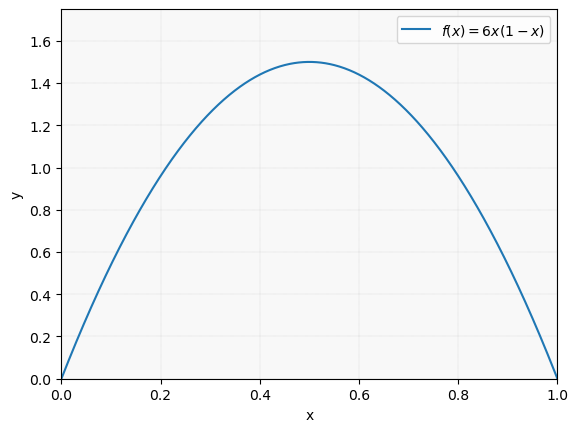

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 6 * x * (1 - x)

xs = np.linspace(0, 1, 1000)
ys = f(xs)

plt.plot(xs, ys, label=r"$f(x) = 6x(1-x)$") 
plt.grid(color='gray', linestyle='--', linewidth=0.15, alpha=0.65)
plt.xlim(0, 1), plt.ylim(0, 1.75), plt.xlabel("x"), plt.ylabel("y"), plt.legend()
plt.gca().set_facecolor('#F8F8F8')
plt.show()

Prosseguindo vamos definir uma função que segue os passos indicados no método "_Accept/Reject_" de amostragem. 

((0.0, 1.0),
 (0.0, 1.75),
 Text(0.5, 0, 'x'),
 Text(0, 0.5, 'f(x)'),
 <matplotlib.legend.Legend at 0x78a33b1f5d10>)

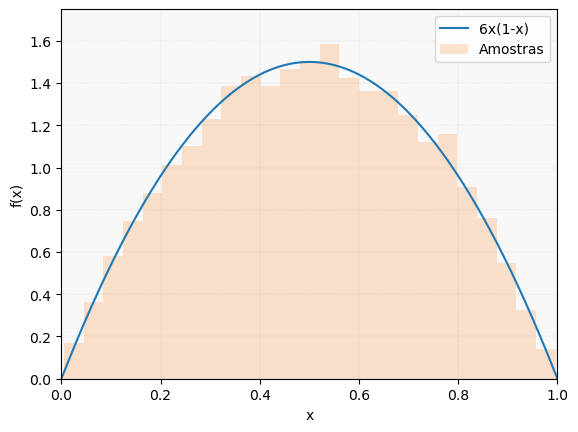

In [2]:
def amostragem(f, n_amostras, xmin=0, xmax=1, ymax=1.6, tamanho=1500):
    
    amostras = []
    
    while len(amostras) < n_amostras:
        
        x = np.random.uniform(low=xmin, high=xmax, size=tamanho)
        y = np.random.uniform(low=0, high=ymax, size=tamanho)
        
        amostras += x[y < f(x)].tolist()
        
    return amostras[:n_amostras]

samps = amostragem(f, 10000)

plt.plot(xs, ys, label="6x(1-x)")
plt.hist(samps, density=True, alpha=0.2, bins=25, label="Amostras")
plt.grid(color='gray', linestyle='--', linewidth=0.15, alpha=0.65)
plt.gca().set_facecolor('#F8F8F8') 
plt.xlim(0, 1), plt.ylim(0, 1.75), plt.xlabel("x"), plt.ylabel("f(x)"), plt.legend()

Tempo decorrido: 146.03 segundos
Eficiência média: 19.2


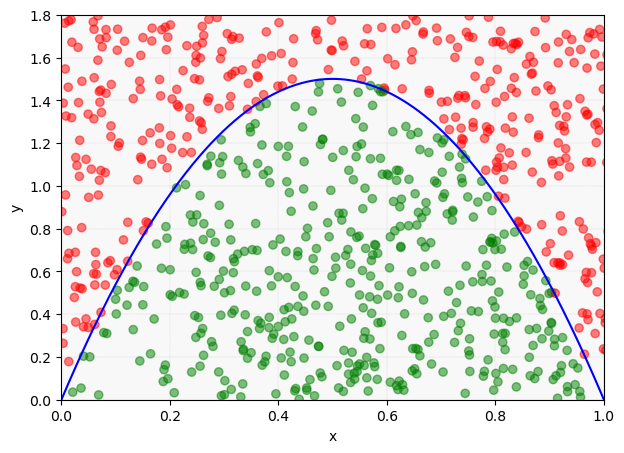

In [3]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def f(x):
    return 6 * x * (1 - x)

fig, ax = plt.subplots(figsize=(7, 5))

x_ = []
y_ = []
cores = []
y_aceitos = []

tempo_inicial = time.time()  

def animacao_func(i):
    if i < 100:
        delay_factor = 4  
    else:
        delay_factor = 1
    
    y_aceitos_quadro = []
    
    for _ in range(delay_factor):
        x_novo = np.random.uniform(low=0, high=1.8)
        y_novo = np.random.uniform(low=0, high=1.8)

        if y_novo < f(x_novo):
            cor = 'green'
            y_aceitos_quadro.append(y_novo)
        else:
            cor = 'red'

        x_.append(x_novo)
        y_.append(y_novo)
        cores.append(cor)
    
    if y_aceitos_quadro:
        y_aceitos.append(np.mean(y_aceitos_quadro))
    else:
        y_aceitos.append(0)
         
        
    ax.clear()
    xs = np.linspace(0, 1, 1000)
    ys = f(xs)

    ax.scatter(x_, y_, c=cores, alpha=0.5)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.8)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    ax.plot(xs, ys, label=r"$f(x) = 6x(1-x)$", color="blue")
    ax.grid(color='gray', linestyle='--', linewidth=0.15, alpha=0.65)
    ax.set_facecolor('#F8F8F8')

ani = FuncAnimation(fig, animacao_func, frames=1200, interval=10) 

ani.save('Accept-Reject_v2.mp4', writer='ffmpeg', fps=120)
tempo_final = time.time()  
delta_t = tempo_final - tempo_inicial
print(f"Tempo decorrido: {delta_t:.2f} segundos")
print(f"Eficiência média: {np.mean(y_aceitos)*100:0.1f}")
plt.show()

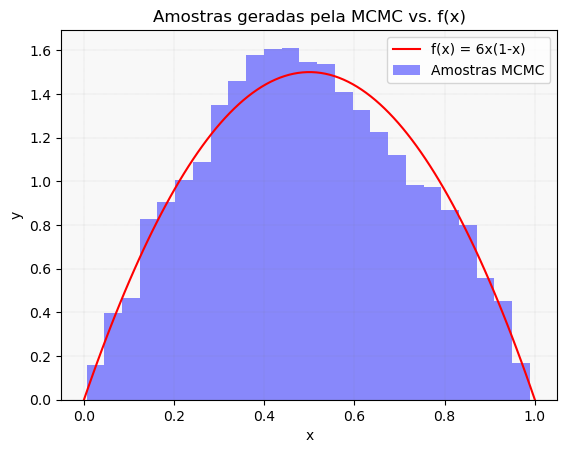

Taxa de eficiência: 91.44%


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 6 * x * (1 - x)

def q(y):
    return y + np.random.uniform(-0.11, 0.11)

def MCMC(iteracoes):
    amostra_atual = np.random.uniform(0, 1)
    amostra = [amostra_atual]  
    propostas_aceitas = 0 
    
    for _ in range(iteracoes):
        
        candidata = q(amostra_atual)
        
        AC_ratio = min(1, f(candidata) / f(amostra_atual))
        
        if np.random.rand() < AC_ratio:
            amostra_atual = candidata
            propostas_aceitas += 1  
        
        amostra.append(amostra_atual)
    
    # Calcula a eficiência (taxa de aceitação)
    eficiencia = propostas_aceitas / iteracoes * 100
    
    return amostra, eficiencia

iteracoes = 10000

# Executa o algoritmo MCMC para gerar amostras da função f(x) e calcula a eficiência
amostragem_final, eficiencia = MCMC(iteracoes)

# Plot
plt.hist(amostragem_final, bins=25, density=True, alpha=0.45, color='blue', label='Amostras MCMC')
x = np.linspace(0, 1, 100)
plt.plot(x, f(x), color='red', label='f(x) = 6x(1-x)')
plt.grid(color='gray', linestyle='--', linewidth=0.15, alpha=0.65)
plt.gca().set_facecolor('#F8F8F8') 
plt.xlabel('x')
plt.ylabel('y')
plt.title('Amostras geradas pela MCMC vs. f(x)')
plt.legend()
plt.show()

print(f"Taxa de eficiência: {eficiencia:.2f}%")

# 5 - Conclusão

A diferença de eficiência entre os códigos de amostragem utilizando MCMC (Metropolis-Hastings sampling) e o método Accept/Reject é notável. Enquanto o método Accept/Reject é direto e intuitivo, ele pode se tornar ineficiente para funções complexas ou em espaços de alta dimensionalidade. Isso ocorre porque muitas propostas de amostras são rejeitadas, levando a um desperdício de recursos computacionais. Por outro lado, o algoritmo MCMC, especialmente com o esquema de Metropolis-Hastings, tende a ser mais eficiente. Isso se deve à sua capacidade de explorar o espaço de busca de maneira mais eficaz, adaptando-se dinamicamente às características da função alvo. 

Explicando melhor: ele usa uma estratégia inteligente de aceitar ou rejeitar amostras com base em uma razão de aceitação calculada. Isso permite que o algoritmo concentre sua exploração em regiões do espaço onde a função alvo é mais significativa, aumentando a eficiência global do processo de amostragem.


Além disso, o MCMC é mais flexível e versátil, podendo lidar com uma ampla gama de distribuições de probabilidade e problemas de modelagem. Sua capacidade de gerar amostras representativas de maneira mais eficiente e sua aplicabilidade a uma variedade de cenários o tornam uma escolha preferencial em muitas aplicações estatísticas e de aprendizado de máquina.